Importing necessary libraries

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import twint
from datetime import date, timedelta
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import datetime
import os 
import calendar 
import datetime
import random
import matplotlib.pyplot as plt
from spellchecker import SpellChecker
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction import text
import warnings
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from corextopic import corextopic as ct
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth",-1)

In [2]:
texts = pd.read_excel('AJCommentsClassification-CF 1.xlsx')
texts.head(20)

_unit_id  _golden _unit_state  _trusted_judgments   _last_judgment_at  \
0   1222281157  False    finalized   3                   4/28/2017 09:33:06   
1   1222285733  False    finalized   3                   4/28/2017 17:56:51   
2   1222286720  False    finalized   3                   4/28/2017 14:39:21   
3   1222288714  False    finalized   3                   4/28/2017 18:28:32   
4   1222288673  False    finalized   3                   4/28/2017 18:37:30   
5   1222288503  False    finalized   3                   4/28/2017 18:16:39   
6   1222288493  False    finalized   3                   4/28/2017 17:52:56   
7   1222304167  False    finalized   3                   4/30/2017 22:57:10   
8   1222291234  False    finalized   3                   4/28/2017 22:21:17   
9   1222284584  False    finalized   3                   4/28/2017 13:00:30   
10  1222310597  False    finalized   3                   5/3/2017 05:11:14    
11  1222309960  False    finalized   3                   5/2/2017 21:40:13    
12  1222305127  False    finalized   3                   5/1/2017 07:55:23    
13  1222305104  False    finalized   3                   5/1/2017 07:49:36    
14  1222307933  False    finalized   4                   5/2/2017 03:36:02    
15  1222307799  False    finalized   3                   5/1/2017 23:12:29    
16  1222307624  False    finalized   3                   5/1/2017 21:23:44    
17  1222301521  False    finalized   3                   4/30/2017 11:39:50   
18  1222301518  False    finalized   3                   4/30/2017 11:39:50   
19  1222301515  False    finalized   3                   4/30/2017 11:01:52   

    languagecomment  languagecomment:confidence  \
0  -1                1.0000                       
1  -1                1.0000                       
2  -1                1.0000                       
3  -1                1.0000                       
4   0                0.6688                       
5  -1                1.0000                       
6  -1                1.0000                       
7  -1                1.0000                       
8  -1                0.6964                       
9  -1                0.6678                       
10  0                0.6783                       
11 -1                1.0000                       
12 -1                1.0000                       
13 -1                1.0000                       
14 -1                0.7773                       
15  0                0.6698                       
16 -1                1.0000                       
17  0                1.0000                       
18  0                0.6764                       
19  0                0.6786                       

                                                articletitle  \
0   سوريا.. اجتماع بفيينا ومجازر على الأرض                     
1   تصفية المعارضين بمصر.. تصرفات فردية أم ممنهجة؟             
2   إياد مدني: لدينا مبادرات لحل أزمات العالم الإسلامي         
3   انتخابات المغرب ومسار الإصلاح                              
4   انتخابات المغرب ومسار الإصلاح                              
5   انتخابات المغرب ومسار الإصلاح                              
6   انتخابات المغرب ومسار الإصلاح                              
7   إدلب.. المعارضة تتقدم والنصرة تُقصَف                       
8   أسباب فشل مفاوضات الزبداني والفوعة بسوريا                  
9   الازدواجية الأميركية بالتعامل مع حوادث القتل الجماعي       
10  مشاركة الحشد الشعبي في معارك الأنبار والتبعات المحتملة     
11  مشاركة الحشد الشعبي في معارك الأنبار والتبعات المحتملة     
12  النكبة.. حق يأبى النسيان                                   
13  النكبة.. حق يأبى النسيان                                   
14  أسأل مع القاسم عن الدور الذي تلعبه المقاومة بلبنان         
15  أسأل مع القاسم عن الدور الذي تلعبه المقاومة بلبنان         
16  حقيقة دور حلف "الممانعة والمقاومة" في لبنان                
17  اشتباك بين ضيفي "الاتجاه المعاكس" بحلقة عن الجيش العراقي   
18  اشتباك بين ضيفي "الاتجاه المعاكس" بحلقة عن الجيش العرا

Check if there are any duplicated rows.

In [3]:
texts.duplicated().value_counts()

False    31692
dtype: int64

In [4]:
texts.shape

(31692, 15)

In [5]:
texts=texts.drop_duplicates()
texts.duplicated().value_counts()

False    31692
dtype: int64

In [6]:
texts["languagecomment"].value_counts(normalize=True)

-1    0.804809
 0    0.178373
-2    0.016818
Name: languagecomment, dtype: float64

In [7]:
#texts["languagecomment"].value_counts().plot.bar(color=['green', '#f5005a', 'blue'], title='Language comment')

In [8]:
print(pd.__version__)
print(np.__version__)
#!pip install numpy==1.19.5

1.2.4
1.20.1


In [9]:
texts['sentiment'] = np.where(texts['languagecomment'] <= -1, 'negative', 'positive ')

# Include only the sentiment and reviews columns
texts = texts[['sentiment', 'text']]
texts.head(20)

sentiment  \
0   negative    
1   negative    
2   negative    
3   negative    
4   positive    
5   negative    
6   negative    
7   negative    
8   negative    
9   negative    
10  positive    
11  negative    
12  negative    
13  negative    
14  negative    
15  positive    
16  negative    
17  positive    
18  positive    
19  positive    

                                                                                                                                                                                                       text  
0   يبغي التنبيه على ان السعودية تستخدم صواريخ جو-ارض مزودة بتقنيات بوليس النهي عن المنكر في الجلد في الساحات،\nالمعروفة بدقتها المطلقة، في اليمن!                                                           
1   أمريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد من الشرطة المصرية أن تفعل عندما تتعامل مع مسلحين معهم متفجرات                                                                                            
2   هذا الشخص هو من كان مؤيد لاحتلال العراق وضرب افغانستان ومحارب للاسلام. ولست متوقع ان قناة الجزيرة تنزل لهذا المستوى.                                                                                     
3   الى جمال ريان مذيع الجزيرة نحن من رعاك فى المهد واطعمناك من خيرنا وعلمناك من علمنا ولما اشتدد عودك خونتنا وبعت ارضك وقضيتك حقدا على مصر                                                                  
4   خيبة الأمل ليست تشاؤما ولا تقولا ٠\nعزم لكفالة اليتيم ولو بالعشرين وأبيه وأُمَّــــه ٠                                                                                                                   
5   سفينة الأكاذيب  والنفاق  والفاسد والاستبداد                                                                                                                                                              
6   لست أدري  من هو الذي  ستنطفىء  شمعته وتتحرق  من دخل في اللعبة المغشوشة أم من  نأى بنفسه عن قذارة وأوساخ القرون                                                                                           
7   جمال خاشقجي اللبرالي العلماني يتحول من داعيه عهر ودياثه الى الدعوه للجهاد تاب  ادعوا له بالثبات نصر الله بك المجاهدين                                                                                    
8   طرف ثالث محايد مثل من؟  الامم المتحده (‘دو المسلمين واداه الاستعمال الاولى), ام اوردوغان الدجال الذي يحاصر المسلمين ويسمح للاستعمار الكافر بقصفهم من اراضيه؟                                             
9   عجيب, لقد اصبحت تعريف كلمة الارهاب بما  يخص بها المسلمين,حتي علموها هذه الكلمة علي قناة الجزيرة بدليل هذا التقرير.                                                                                       
10  تبع ايران                                                                                                                                                                                                
11  ليس هناك  حشد شعبي  وإنما هو حقد شيعي  على السنة .                                                                                                                                                       
12  هل ورثة قناة الجزيرة القضية الفلسطينية من وسائل اعلام عربية  اكثر من 60سنة وهم يتاجرون بالقضية الفلسطينية                                                                                                
13  االا لا تشعرون ان النكبة هى نكبتنا بداخلناوبكل دولةعربيةفلم تحتل الا (اسرائيل)فلسطين  فهى كذبة كبيرة بل الاستعمار احتلنا كلناونصب اسرائيل) على كل ارض عربية وكونوا (اسرائيل)الكبرى قبل ما يحتلون فلسطين  
14  وكيف تكونوا مقاومين وافعالكم كاليهوذ                                                                                                                                                                     
15  هل لو كان الحريري هو                                                                                                                                                                                     
16  اوﻻ هذا البرنامج الذي يقدمه فيصل القاسم هو برنامج فتن ليس اﻻ\nبرنامج يثير الفتن بين المجتمعات في الدول العربية وهو برنامج في خدمة العدو الصه

### Cleaning the texts

Cleaning the text colums. Removing links, symbols, emojis, etc.

In [10]:
    import nltk
    from nltk import tokenize
    #nltk.download('stopwords')
    #!pip install emoji
    from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
    import string
    from emoji import UNICODE_EMOJI
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords
################## Global Variable ##########################
    arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))
    arabic_diacritics = re.compile("""
                                     ّ    | # Tashdid
                                     َ    | # Fatha
                                     ً    | # Tanwin Fath
                                     ُ    | # Damma
                                     ٌ    | # Tanwin Damm
                                     ِ    | # Kasra
                                     ٍ    | # Tanwin Kasr
                                     ْ    | # Sukun
                                    ـ     # Tatwil/Kashida
                                   """, re.VERBOSE)

    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    english_punctuations = string.punctuation
    punctuations_list = arabic_punctuations + english_punctuations

    

In [11]:
def remove_urls (tex):
    tex = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b\r\n', '', tex, flags=re.MULTILINE)
    return tex

def remove_emails(tex):
    tex = re.sub(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", "",  tex, flags=re.MULTILINE)
    return tex
#Text Normalization
def normalize_arabic(tex):
    tex = re.sub("[إأآا]", "ا", tex)
    tex = re.sub("ى", "ي", tex)
    tex = re.sub("ؤ", "ء", tex)
    tex = re.sub("ئ", "ء", tex)
    tex = re.sub("ة", "ه", tex)
    tex = re.sub("گ", "ك", tex)
    return tex
def remove_diacritics(tex):
    tex = re.sub(arabic_diacritics, '', tex)
    return tex
def remove_stopwords(tex):
    filtered_sentence = [w for w in tex.split() if not w in arb_stopwords]
    return ' '.join(filtered_sentence)
def remove_punctuations(tex):
    translator = str.maketrans('', '', punctuations_list)
    return tex.translate(translator)
def hasDigits(s):
    return any( 48 <= ord(char) <= 57  or 1632 <= ord(char) <= 1641 for char in s)

In [12]:
stop_words=arb_stopwords

In [13]:
def clean_content(line):
    if (isinstance(line, float)):
        return None
    line.replace('\n', ' ')
   
    line = remove_emails(line)
    line = remove_urls(line)
    nline = [w if '@' not in w else 'USERIDX' for w in line.split()]
    line = ' '.join(nline)
    line = line.replace('RT', '').replace('<LF>', '').replace('<br />','').replace('&quot;', '').replace('<url>', '')


    # add spaces between punc,
    line = line.translate(str.maketrans({key: " {0} ".format(key) for key in punctuations_list}))

    # then remove punc,
    translator = str.maketrans('', '', punctuations_list)
    line = line.translate(translator)

    line=remove_diacritics(normalize_arabic(line))

    line = remove_stopwords(line)

    #replace number
    nline = [word if not hasDigits(word) else '<NUM>' for word in line.split()]
    line = ' '.join(nline)

    return line

In [14]:
!pip install transformers
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('aubmindlab/bert-base-arabertv02', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []
    
    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            texts=clean_content(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

Data after cleaning

In [15]:
texts.head()

sentiment  \
0  negative    
1  negative    
2  negative    
3  negative    
4  positive    

                                                                                                                                             text  
0  يبغي التنبيه على ان السعودية تستخدم صواريخ جو-ارض مزودة بتقنيات بوليس النهي عن المنكر في الجلد في الساحات،\nالمعروفة بدقتها المطلقة، في اليمن!  
1  أمريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد من الشرطة المصرية أن تفعل عندما تتعامل مع مسلحين معهم متفجرات                                   
2  هذا الشخص هو من كان مؤيد لاحتلال العراق وضرب افغانستان ومحارب للاسلام. ولست متوقع ان قناة الجزيرة تنزل لهذا المستوى.                            
3  الى جمال ريان مذيع الجزيرة نحن من رعاك فى المهد واطعمناك من خيرنا وعلمناك من علمنا ولما اشتدد عودك خونتنا وبعت ارضك وقضيتك حقدا على مصر         
4  خيبة الأمل ليست تشاؤما ولا تقولا ٠\nعزم لكفالة اليتيم ولو بالعشرين وأبيه وأُمَّــــه ٠

Saving the cleaned dataframe in a csv file.

In [16]:
texts.to_csv('Atexts_cleaned.csv', index=False)

## superviesd
### Prepare data for modeling

In [17]:
X = texts.text
y = texts.sentiment

In [18]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words=stop_words,max_df=0.90,min_df = 3)

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

000  10  100  1000  11  12  120  1200  13  14  ...  یعنی  یقاتلون  یقول  \
0  0    0   0    0     0   0   0    0     0   0   ...  0     0        0      
1  0    0   0    0     0   0   0    0     0   0   ...  0     0        0      
2  0    0   0    0     0   0   0    0     0   0   ...  0     0        0      
3  0    0   0    0     0   0   0    0     0   0   ...  0     0        0      
4  0    0   0    0     0   0   0    0     0   0   ...  0     0        0      

   یقولون  یمن  یهود  یوم  یوما  یکون  ﻻن  
0  0       0    0     0    0     0     0   
1  0       0    0     0    0     0     0   
2  0       0    0     0    0     0     0   
3  0       0    0     0    0     0     0   
4  0       0    0     0    0     0     0   

[5 rows x 16893 columns]

In [20]:
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words=stop_words, max_df=0.90,min_df = 3)

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

000  10  100  100 سنة  1000  11  12  120  1200  13  ...  یقاتلون بانهم  \
0  0    0   0    0        0     0   0   0    0     0   ...  0               
1  0    0   0    0        0     0   0   0    0     0   ...  0               
2  0    0   0    0        0     0   0   0    0     0   ...  0               
3  0    0   0    0        0     0   0   0    0     0   ...  0               
4  0    0   0    0        0     0   0   0    0     0   ...  0               

   یقول  یقولون  یمن  یهود  یهود آل  یوم  یوما  یکون  ﻻن  
0  0     0       0    0     0        0    0     0     0   
1  0     0       0    0     0        0    0     0     0   
2  0     0       0    0     0        0    0     0     0   
3  0     0       0    0     0        0    0     0     0   
4  0     0       0    0     0        0    0     0     0   

[5 rows x 21839 columns]

In [21]:
 #Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [22]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [23]:
# Train the second model
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [24]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

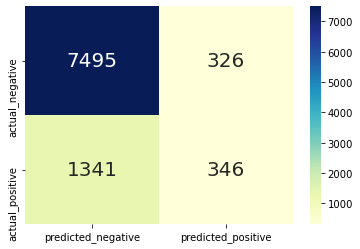

In [25]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

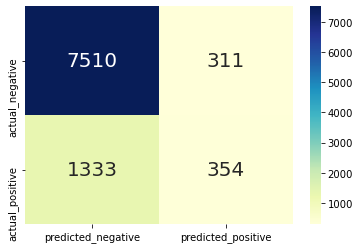

In [26]:
# The heat map for the second logistic regression model
cm2 = conf_matrix(y_test, y_pred_cv2)

In [27]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1', 'LogReg2']
results

LogReg1  LogReg2
Accuracy   0.825    0.827  
Precision  0.515    0.532  
Recall     0.205    0.210  
F1 Score   0.293    0.301

## classifying using Naive Bayes

In [28]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [29]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv2)

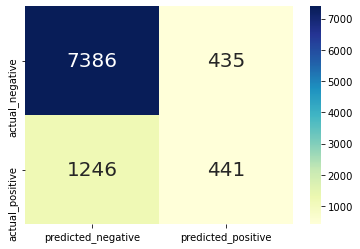

In [30]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

# Unsuperviesd

### Vectorization

Reading the cleaned dataframe.

In [31]:
texts = pd.read_csv('Atexts_cleaned.csv')

Let's try feature extraction using both CountVectorizer and TfidfVectorizer.

**CountVectorizer**

In [32]:
#coun_vect = CountVectorizer(stop_words=stop_words,ngram_range=(1,2),max_df=0.90,min_df = 3)
#cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words=stop_words, max_df=0.90,min_df = 3)
count_matrix = cv2.fit_transform(texts['text'])
count_array = count_matrix.toarray()
texts_vec = pd.DataFrame(data=count_array,columns = cv2.get_feature_names())
texts_vec

000  10  100  100 سنة  1000  11  11 مصغرة  12  120  1200  ...  یهود  \
0      0    0   0    0        0     0   0         0   0    0     ...  0      
1      0    0   0    0        0     0   0         0   0    0     ...  0      
2      0    0   0    0        0     0   0         0   0    0     ...  0      
3      0    0   0    0        0     0   0         0   0    0     ...  0      
4      0    0   0    0        0     0   0         0   0    0     ...  0      
...   ..   ..  ..   ..       ..    ..  ..        ..  ..   ..     ... ..      
31687  0    0   0    0        0     0   0         0   0    0     ...  0      
31688  0    0   0    0        0     0   0         0   0    0     ...  0      
31689  0    0   0    0        0     0   0         0   0    0     ...  0      
31690  0    0   0    0        0     0   0         0   0    0     ...  0      
31691  0    0   0    0        0     0   0         0   0    0     ...  0      

       یهود آل  یوم  یوما  یکون  ﻻسرائيل  ﻻسرائيل اللعنة  ﻻمريكا  \
0      0        0    0     0     0        0               0        
1      0        0    0     0     0        0               0        
2      0        0    0     0     0        0               0        
3      0        0    0     0     0        0               0        
4      0        0    0     0     0        0               0        
...   ..       ..   ..    ..    ..       ..              ..        
31687  0        0    0     0     0        0               0        
31688  0        0    0     0     0        0               0        
31689  0        0    0     0     0        0               0        
31690  0        0    0     0     0        0               0        
31691  0        0    0     0     0        0               0        

       ﻻمريكا الموت  ﻻن  
0      0             0   
1      0             0   
2      0             0   
3      0             0   
4      0             0   
...   ..            ..   
31687  0             0   
31688  0             0   
31689  0             0   
31690  0             0   
31691  0             0   

[31692 rows x 30522 columns]

Explore the 20 most common words.

In [33]:
texts_vec.sum(0).sort_values(ascending=False)[:20]

الله        4909
ان          3403
الى         1442
الا         1257
مصر         1156
الدولة      1060
الجزيرة     1059
السيسي      970 
السعودية    935 
المسلمين    906 
او          903 
العرب       896 
والله       894 
اللهم       839 
الشعب       839 
ايران       777 
اليمن       758 
انت         715 
داعش        665 
سوريا       628 
dtype: int64

**TfidfVectorizer**

In [34]:
tfidf_vect = TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2),max_df=0.90,min_df = 3)
tfidf_matrix = tfidf_vect.fit_transform(texts['text'])
tfidf_array = tfidf_matrix.toarray()
texts_tfidf = pd.DataFrame(data=tfidf_array,columns = tfidf_vect.get_feature_names())
texts_tfidf

000   10  100  100 سنة  1000   11  11 مصغرة   12  120  1200  ...  یهود  \
0      0.0  0.0  0.0  0.0      0.0   0.0  0.0       0.0  0.0  0.0   ...  0.0    
1      0.0  0.0  0.0  0.0      0.0   0.0  0.0       0.0  0.0  0.0   ...  0.0    
2      0.0  0.0  0.0  0.0      0.0   0.0  0.0       0.0  0.0  0.0   ...  0.0    
3      0.0  0.0  0.0  0.0      0.0   0.0  0.0       0.0  0.0  0.0   ...  0.0    
4      0.0  0.0  0.0  0.0      0.0   0.0  0.0       0.0  0.0  0.0   ...  0.0    
...    ...  ...  ...  ...      ...   ...  ...       ...  ...  ...   ...  ...    
31687  0.0  0.0  0.0  0.0      0.0   0.0  0.0       0.0  0.0  0.0   ...  0.0    
31688  0.0  0.0  0.0  0.0      0.0   0.0  0.0       0.0  0.0  0.0   ...  0.0    
31689  0.0  0.0  0.0  0.0      0.0   0.0  0.0       0.0  0.0  0.0   ...  0.0    
31690  0.0  0.0  0.0  0.0      0.0   0.0  0.0       0.0  0.0  0.0   ...  0.0    
31691  0.0  0.0  0.0  0.0      0.0   0.0  0.0       0.0  0.0  0.0   ...  0.0    

       یهود آل  یوم  یوما  یکون  ﻻسرائيل  ﻻسرائيل اللعنة  ﻻمريكا  \
0      0.0      0.0  0.0   0.0   0.0      0.0             0.0      
1      0.0      0.0  0.0   0.0   0.0      0.0             0.0      
2      0.0      0.0  0.0   0.0   0.0      0.0             0.0      
3      0.0      0.0  0.0   0.0   0.0      0.0             0.0      
4      0.0      0.0  0.0   0.0   0.0      0.0             0.0      
...    ...      ...  ...   ...   ...      ...             ...      
31687  0.0      0.0  0.0   0.0   0.0      0.0             0.0      
31688  0.0      0.0  0.0   0.0   0.0      0.0             0.0      
31689  0.0      0.0  0.0   0.0   0.0      0.0             0.0      
31690  0.0      0.0  0.0   0.0   0.0      0.0             0.0      
31691  0.0      0.0  0.0   0.0   0.0      0.0             0.0      

       ﻻمريكا الموت   ﻻن  
0      0.0           0.0  
1      0.0           0.0  
2      0.0           0.0  
3      0.0           0.0  
4      0.0           0.0  
...    ...           ...  
31687  0.0           0.0  
31688  0.0           0.0  
31689  0.0           0.0  
31690  0.0           0.0  
31691  0.0           0.0  

[31692 rows x 30522 columns]

# Topic Modeling

Using feature extracted from Count Vectorizer and TF-IDF Vectorizer, we will try and compare different topic modeling algorithms LSA, LDA, Corex and NMF to extract topics for a set of processed tweets.

In [35]:
# function for displaying the words in each topic to be used for all models.
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
# https://github.com/hiranya33/Metis-Fletcher/blob/master/FletcherLDA-sklearn.ipynb

**LSA model using features extracted from TF-IDF Vectorizer**

Lets see how the model performs with 2 to 8 topics.

In [36]:
lsa_model_2 = TruncatedSVD(2)
lsa_cv_doc_topic = lsa_model_2.fit_transform(tfidf_matrix)

In [37]:
display_topics(lsa_model_2, tfidf_vect.get_feature_names(), 20) 


Topic  0
الله, ان, شاء, شاء الله, الى, الدولة, الا, مصر, السيسي, ان شاء, والله, المسلمين, اللهم, او, لعنة, الجزيرة, لعنة الله, العرب, ايران, السعودية

Topic  1
الله, لعنة الله, لعنة, الله اكبر, شاء الله, شاء, بارك الله, بارك, الوكيل, بإذن, بإذن الله, الله ونعم, ونعم الوكيل, اكبر, صلى الله, ونعم, صلى, حسبنا الله, رسول, رسول الله


In [38]:
lsa_model_3 = TruncatedSVD(3)
lsa_cv_doc_topic = lsa_model_3.fit_transform(tfidf_matrix)

In [39]:
display_topics(lsa_model_3, tfidf_vect.get_feature_names(), 15) 


Topic  0
الله, ان, شاء, شاء الله, الى, الا, الدولة, مصر, السيسي, ان شاء, والله, المسلمين, اللهم, او, لعنة

Topic  1
الله, لعنة الله, لعنة, شاء الله, الله اكبر, شاء, بارك الله, بارك, الوكيل, بإذن, بإذن الله, الله ونعم, ونعم الوكيل, ونعم, صلى الله

Topic  2
ان, شاء, شاء الله, ان شاء, يجب ان, يجب, الله, الله ان, يبدو ان, ان يكون, ان تكون, تكون, ان الله, يبدو, اعتقد ان


In [40]:
lsa_model_4 = TruncatedSVD(4)
lsa_cv_doc_topic = lsa_model_4.fit_transform(tfidf_matrix)

In [41]:
display_topics(lsa_model_4, tfidf_vect.get_feature_names(), 15) 


Topic  0
الله, ان, شاء, شاء الله, الى, الا, الدولة, مصر, السيسي, ان شاء, والله, المسلمين, اللهم, او, لعنة

Topic  1
الله, لعنة الله, لعنة, شاء الله, الله اكبر, شاء, بارك الله, بارك, الوكيل, بإذن, بإذن الله, الله ونعم, اكبر, صلى الله, ونعم الوكيل

Topic  2
ان, شاء, شاء الله, ان شاء, يجب ان, يجب, الله ان, الله, يبدو ان, ان تكون, ان يكون, تكون, ان الله, يبدو, اعتقد ان

Topic  3
الدولة, ان, الإسلامية, الاسلامية, الدولة الإسلامية, الدولة الاسلامية, تنظيم, تنظيم الدولة, شاء, شاء الله, ان شاء, لله, الحمد, الحمد لله, باقية


In [42]:
lsa_model_5 = TruncatedSVD(5)
lsa_cv_doc_topic = lsa_model_5.fit_transform(tfidf_matrix)

In [43]:
display_topics(lsa_model_5, tfidf_vect.get_feature_names(), 15) 


Topic  0
الله, ان, شاء, شاء الله, الى, الا, الدولة, مصر, السيسي, ان شاء, والله, المسلمين, اللهم, او, لعنة

Topic  1
الله, لعنة الله, لعنة, شاء الله, الله اكبر, شاء, بارك الله, بارك, الوكيل, بإذن, بإذن الله, الله ونعم, ونعم الوكيل, ونعم, اكبر

Topic  2
ان, شاء, شاء الله, ان شاء, يجب ان, يجب, الله ان, الله, يبدو ان, ان تكون, ان يكون, تكون, ان الله, يبدو, اعتقد ان

Topic  3
مصر, السيسي, الشعب, فى, انت, المصري, العرب, تحيا, تحيا مصر, لعنة, الشعب المصري, الله, لعنة الله, اليمن, الى

Topic  4
اللهم, رب, العالمين, رب العالمين, امين, لله, الحمد, انصر, اللهم انصر, ان, الحمد لله, امين رب, زد, اللهم زد, وبارك


In [44]:
lsa_model_6 = TruncatedSVD(6)
lsa_cv_doc_topic = lsa_model_6.fit_transform(tfidf_matrix)

In [45]:
display_topics(lsa_model_6, tfidf_vect.get_feature_names(), 15) 


Topic  0
الله, ان, شاء, شاء الله, الى, الا, الدولة, مصر, السيسي, ان شاء, والله, المسلمين, اللهم, او, لعنة

Topic  1
الله, لعنة الله, لعنة, الله اكبر, شاء الله, شاء, بارك الله, بارك, الوكيل, بإذن, بإذن الله, الله ونعم, اكبر, ونعم الوكيل, صلى الله

Topic  2
ان, شاء, شاء الله, ان شاء, يجب ان, يجب, الله ان, الله, يبدو ان, ان تكون, ان يكون, تكون, ان الله, يبدو, اعتقد ان

Topic  3
الدولة, ان, الاسلامية, الإسلامية, الدولة الاسلامية, الدولة الإسلامية, تنظيم, تنظيم الدولة, شاء, شاء الله, لله, الحمد, الحمد لله, ان شاء, باقية

Topic  4
اللهم, رب, العالمين, رب العالمين, امين, لله, الحمد, انصر, اللهم انصر, الحمد لله, امين رب, زد, اللهم زد, جهنم, ان

Topic  5
السيسي, مصر, اللهم, الدولة, شاء, شاء الله, ان, ان شاء, المصري, فى, الإسلامية, الدولة الإسلامية, تحيا, تحيا مصر, تنظيم الدولة


In [46]:
lsa_model_7 = TruncatedSVD(7)
lsa_cv_doc_topic = lsa_model_7.fit_transform(tfidf_matrix)

In [47]:
display_topics(lsa_model_7, tfidf_vect.get_feature_names(), 15) 


Topic  0
الله, ان, شاء, شاء الله, الى, الا, الدولة, مصر, السيسي, ان شاء, والله, المسلمين, اللهم, او, لعنة

Topic  1
الله, لعنة الله, لعنة, شاء الله, الله اكبر, شاء, بارك الله, بارك, الوكيل, بإذن, بإذن الله, الله ونعم, ونعم الوكيل, اكبر, ونعم

Topic  2
ان, شاء, شاء الله, ان شاء, يجب ان, يجب, الله ان, الله, يبدو ان, ان يكون, ان تكون, تكون, يبدو, او, ان الله

Topic  3
الدولة, الإسلامية, الدولة الإسلامية, الاسلامية, ان, الدولة الاسلامية, تنظيم, تنظيم الدولة, شاء, شاء الله, ان شاء, باقية, أسود, أسود الدولة, الخلافة

Topic  4
اللهم, رب, لله, الحمد, العالمين, رب العالمين, امين, انصر, الحمد لله, اللهم انصر, امين رب, دولة, ان, زد, اللهم زد

Topic  5
السيسي, مصر, اللهم, الدولة, ان, شاء, شاء الله, ان شاء, لله, الحمد, الإسلامية, الدولة الإسلامية, الحمد لله, الاسلامية, الدولة الاسلامية

Topic  6
الجزيرة, قناة, قناة الجزيرة, لله, الحمد, اللهم, الحمد لله, قطر, لماذا, رب, العالمين, تنشر, فى, نت, رب العالمين


In [48]:
lsa_model_8 = TruncatedSVD(8)
lsa_cv_doc_topic = lsa_model_8.fit_transform(tfidf_matrix)

In [49]:
display_topics(lsa_model_8, tfidf_vect.get_feature_names(), 15) 


Topic  0
الله, ان, شاء, شاء الله, الى, الا, الدولة, مصر, السيسي, ان شاء, والله, المسلمين, اللهم, او, لعنة

Topic  1
الله, لعنة الله, لعنة, شاء الله, الله اكبر, شاء, بارك الله, بارك, الوكيل, بإذن, بإذن الله, الله ونعم, ونعم الوكيل, اكبر, صلى الله

Topic  2
ان, شاء, شاء الله, ان شاء, يجب ان, يجب, الله ان, الله, يبدو ان, ان يكون, ان تكون, تكون, يبدو, ان الله, اعتقد ان

Topic  3
الدولة, الإسلامية, ان, الدولة الإسلامية, الاسلامية, الدولة الاسلامية, تنظيم, تنظيم الدولة, شاء, شاء الله, ان شاء, باقية, أسود, أسود الدولة, وتتمدد

Topic  4
اللهم, رب, العالمين, رب العالمين, لله, امين, الحمد, الحمد لله, انصر, اللهم انصر, امين رب, ان, زد, اللهم زد, دولة

Topic  5
السيسي, مصر, ان, اللهم, الدولة, لله, الحمد, الحمد لله, شاء, شاء الله, الإسلامية, الدولة الإسلامية, ان شاء, الاسلامية, الدولة الاسلامية

Topic  6
الجزيرة, قناة, قناة الجزيرة, اللهم, لله, الحمد, الحمد لله, لماذا, قطر, رب, العالمين, فى, رب العالمين, شاء, تنشر

Topic  7
الى, جهنم, المصير, الى جهنم, وبئس, وبئس المصير, لله, جهنم وبئس, الحمد, مصر

Since the LSA model did not perform well, let's see LDA, CorEx and NMF models.

**LDA model using features extracted from Count Vectorizer**

Since LDA has a bulit in TD-IDF we will use CountVectorizer as the vectorizer. We will try the model on 2 to 6 number of topics in order to get the best results.

In [50]:
lda_2 = LatentDirichletAllocation(2)
lda_doc_topic = lda_2.fit_transform(count_matrix)

In [51]:
display_topics(lda_2, cv2.get_feature_names(), 15)


Topic  0
الله, الجزيرة, ان, الدولة, الى, الا, لماذا, المسلمين, او, داعش, فقط, قطر, السعودية, لله, والله

Topic  1
الله, ان, مصر, اللهم, الشعب, الى, الا, ايران, السيسي, العرب, العراق, السعودية, سوريا, والله, او


In [52]:
lda_3 = LatentDirichletAllocation(3)
lda_doc_topic = lda_3.fit_transform(count_matrix)

In [53]:
display_topics(lda_3, cv2.get_feature_names(), 15)


Topic  0
الله, الدولة, ان, الجزيرة, الى, السيسي, مصر, المسلمين, الاسلامية, فى, الإسلامية, فقط, قطر, السعودية, تنظيم

Topic  1
الا, ان, الشعب, اليمن, الى, والله, الله, انت, او, اسرائيل, ايران, اللهم, السعودية, وليس, عملاء

Topic  2
الله, ان, العرب, مصر, الا, اللهم, ايران, شاء, المسلمين, الخليج, شاء الله, الى, دولة, السعودية, والله


In [54]:
lda_4 = LatentDirichletAllocation(4)
lda_doc_topic = lda_4.fit_transform(count_matrix)

In [55]:
display_topics(lda_4, cv2.get_feature_names(), 15)


Topic  0
ان, مصر, الله, الى, فى, انت, اليمن, السيسي, السعودية, امريكا, او, جيش, الا, العرب, ايران

Topic  1
ان, الجزيرة, السعودية, الشعب, او, الا, قطر, الى, لماذا, فقط, اليمن, مصر, العربية, داعش, قناة

Topic  2
الله, اللهم, المسلمين, ان, الا, والله, السيسي, بشار, مصر, لله, دولة, العراق, الحمد, رب, الى

Topic  3
الله, ان, الى, شاء, الدولة, شاء الله, الإسلامية, الاسلاميه, جهنم, الدوله, محمد, المسلمين, الا, والله, العرب


In [56]:
lda_5 = LatentDirichletAllocation(5)
lda_doc_topic = lda_5.fit_transform(count_matrix)

In [57]:
display_topics(lda_5, cv2.get_feature_names(), 15)


Topic  0
الله, ان, الى, الدولة, شاء, المسلمين, الاسلاميه, الدوله, لله, شاء الله, السيسي, الحمد, دولة, الإسلامية, العالم

Topic  1
ان, الجزيرة, الى, الدولة, قناة, الا, العرب, سوريا, او, لماذا, العربية, ايران, اليمن, تنظيم, السعودية

Topic  2
السعودية, ان, الشعب, مصر, المسلمين, الا, اسرائيل, العرب, او, العربية, ضد, قطر, دول, وليس, والله

Topic  3
الله, اللهم, ان, والله, الا, المسلمين, لعنة, ايران, الى, العرب, السيسي, لعنة الله, انصر, الدولة, بشار

Topic  4
الله, ان, مصر, الى, السيسي, الشعب, المصري, داعش, ال, الجيش, فى, اليمن, انت, وليس, الا


In [58]:
lda_6 = LatentDirichletAllocation(6)
lda_doc_topic = lda_6.fit_transform(count_matrix)

In [59]:
display_topics(lda_6, cv2.get_feature_names(), 15)


Topic  0
الله, ان, الا, العربية, الدولة, ايران, او, السعودية, الجزيرة, الى, قطر, انت, وليس, قال, مصر

Topic  1
ان, الجزيرة, مصر, الى, اسرائيل, قناة, لله, الحمد, العالم, سعود, الحمد لله, العرب, فى, الشعب, يجب

Topic  2
الله, ان, السيسي, مصر, لعنة, والله, الا, دولة, الى, قال, بارك, يجب, اللهم, لعنة الله, بارك الله

Topic  3
الله, المسلمين, الى, ان, الاسلاميه, الدوله, سوريا, العرب, والله, الدوله الاسلاميه, ضد, الشيعة, داعش, العراق, الإسلام

Topic  4
الله, ان, الدولة, شاء, اللهم, شاء الله, الى, او, سوريا, الاسلامية, الا, الشعب, العرب, ان شاء, داعش

Topic  5
الله, ان, الا, اليمن, السعودية, انت, والله, السيسي, لماذا, الى, الدولة, فقط, او, الشعب, الخليج


Since the LDA model did not perform well, we can see that some topics are mixed with each other, let's see CorEx and NMF models.

**CorEx model using features extracted from Count Vectorizer and TF-IDF Vectorizer**

In [60]:
# function for displaying the words in each topic to be used for CorEx model.
def corex_topics(topic_model):
    topics = topic_model.get_topics()
    return topics
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('Topic {} keywords: '.format(n) + ', '.join(topic_words))

In [61]:
#count vectorizer
words = list(np.asarray(cv2.get_feature_names()))
topic_model = ct.Corex(n_hidden=5, 
                       words=words,
                       max_iter=100, 
                       seed=42)

topic_model.fit(count_matrix, words=words, docs=texts['text'])

#tf idf
words = list(np.asarray(tfidf_vect.get_feature_names()))
topic_model_2 = ct.Corex(n_hidden=5, 
                       words=words,
                       max_iter=100, 
                       seed=42)
topic_model_2.fit(tfidf_matrix, words=words, docs=texts['text'])

CorEx topic modeling with count vectorizer

In [62]:
topics = corex_topics(topic_model)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
الله, الدولة, شاء, شاء الله, الإسلامية, الاسلامية, الدولة الإسلامية, الدولة الاسلامية, الخلافة, ان شاء,  
 
topic  1 :
اللهم, الحمد, الاسلاميه, لله, الدوله, الحمد لله, الدوله الاسلاميه, بارك, جهنم, بارك الله,  
 
topic  2 :
ان, الجزيرة, الشعب, قناة, العربية, فی, الصهيونى, رب العالمين, اسرائيل, قناة الجزيرة,  
 
topic  3 :
اليمن, السعودية, سوريا, الخليج, العراق, التحالف, ايران, عاصفة, دول الخليج, دول,  
 
topic  4 :
سعود, الجيش, السعودي, ال سعود, ال, آل, آل سعود, تحيا مصر, رئيس, المتحدة,  
 


CorEx topic modeling with TF-IDF vectorizer

In [63]:
topics = corex_topics(topic_model_2)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
اللهم, فی, علی, السعودیة, یا, المصير, جهنم, وبئس المصير, انصر, وبئس,  
 
topic  1 :
الصهيونى, السورى, المستعمرين, اليهوذ, الاستعمار, امين, امين رب, شعوبنا, حكم, عملاء,  
 
topic  2 :
صلى الله, صلى, وسلم, الله وسلم, رضي الله, رضي, الله صلى, رسول الله, رسول, الرسول,  
 
topic  3 :
رولا, قناه, تحيا مصر, تحيا, القحبه, كس, فين, فيروز, جهلها, ليه,  
 
topic  4 :
السعودية, اليمن, الحزم, عاصفة الحزم, اليمني, التحالف, عاصفة, هادي, هه, الشعب اليمني,  
 


The model did not produce sensible topics, let's see how NMF model performs.

**NMF model using features extracted from TF-IDF Vectorizer**

Lets see how the NMF model performs with 2 to 8 topics.

In [64]:
nmf_model_2 = NMF(2)
nmf_doc_topic_2 = nmf_model_2.fit_transform(tfidf_matrix)

In [65]:
display_topics(nmf_model_2, tfidf_vect.get_feature_names(), 15)


Topic  0
الله, شاء, شاء الله, لعنة, لعنة الله, ان شاء, اكبر, الله اكبر, بارك, بارك الله, لله, الوكيل, بإذن, بإذن الله, باذن الله

Topic  1
ان, الى, مصر, الا, الجزيرة, او, السيسي, الدولة, السعودية, العرب, ايران, اليمن, الشعب, انت, المسلمين


In [66]:
nmf_model_3 = NMF(3)
nmf_doc_topic_3 = nmf_model_3.fit_transform(tfidf_matrix)

In [67]:
display_topics(nmf_model_3, tfidf_vect.get_feature_names(), 15)


Topic  0
الله, شاء, شاء الله, لعنة, لعنة الله, ان شاء, اكبر, الله اكبر, بارك, بارك الله, الوكيل, بإذن, بإذن الله, ونعم, باذن الله

Topic  1
ان, مصر, الى, الا, او, الجزيرة, السيسي, السعودية, العرب, ايران, اليمن, انت, الشعب, والله, يجب

Topic  2
الدولة, الإسلامية, الاسلامية, الدولة الإسلامية, اللهم, الدولة الاسلامية, تنظيم, تنظيم الدولة, لله, دولة, الحمد, انصر, رب, اللهم انصر, الحمد لله


In [68]:
nmf_model_4 = NMF(4)
nmf_doc_topic_4 = nmf_model_4.fit_transform(tfidf_matrix)

In [69]:
display_topics(nmf_model_4, tfidf_vect.get_feature_names(), 15)


Topic  0
الله, شاء, شاء الله, لعنة, لعنة الله, ان شاء, اكبر, الله اكبر, بارك الله, بارك, الوكيل, بإذن, بإذن الله, ونعم, باذن الله

Topic  1
ان, مصر, الى, الا, او, الجزيرة, السيسي, السعودية, العرب, اليمن, ايران, انت, الشعب, يجب, والله

Topic  2
اللهم, لله, الحمد, رب, العالمين, الحمد لله, رب العالمين, امين, انصر, اللهم انصر, امين رب, زد, اللهم زد, دولة, وبارك

Topic  3
الدولة, الإسلامية, الدولة الإسلامية, الاسلامية, الدولة الاسلامية, تنظيم, تنظيم الدولة, باقية, أسود, دولة, الخلافة, أسود الدولة, ضد, جنود, وتتمدد


In [70]:
nmf_model_5 = NMF(5)
nmf_doc_topic_5 = nmf_model_5.fit_transform(tfidf_matrix)

In [71]:
display_topics(nmf_model_5, tfidf_vect.get_feature_names(), 15)


Topic  0
الله, شاء, شاء الله, لعنة, لعنة الله, ان شاء, اكبر, الله اكبر, بارك الله, بارك, الوكيل, بإذن, بإذن الله, باذن الله, باذن

Topic  1
ان, الى, الا, او, السعودية, ايران, العرب, اليمن, انت, يجب, اسرائيل, والله, داعش, ان شاء, المسلمين

Topic  2
مصر, السيسي, الجزيرة, فى, الشعب, المصري, قناة, قطر, تحيا, تحيا مصر, قناة الجزيرة, الشعب المصري, الاخوان, لماذا, علي

Topic  3
الدولة, الإسلامية, الدولة الإسلامية, الاسلامية, الدولة الاسلامية, تنظيم, تنظيم الدولة, باقية, أسود, الجزيرة, دولة, الخلافة, ضد, أسود الدولة, داعش

Topic  4
اللهم, لله, الحمد, رب, العالمين, الحمد لله, رب العالمين, امين, انصر, اللهم انصر, امين رب, زد, اللهم زد, دولة, وبارك


In [72]:
nmf_model_6 = NMF(6)
nmf_doc_topic_6 = nmf_model_6.fit_transform(tfidf_matrix)

In [73]:
display_topics(nmf_model_6, tfidf_vect.get_feature_names(), 15)


Topic  0
الله, شاء, شاء الله, لعنة, لعنة الله, اكبر, الله اكبر, ان شاء, بارك الله, بارك, الوكيل, بإذن, بإذن الله, باذن الله, ونعم

Topic  1
ان, شاء, شاء الله, ان شاء, يجب, يجب ان, الله ان, يكون, يبدو, يبدو ان, ان يكون, تكون, او, ان تكون, وان

Topic  2
الى, الا, الجزيرة, السعودية, العرب, او, ايران, اليمن, انت, والله, داعش, المسلمين, العربية, اسرائيل, لماذا

Topic  3
الدولة, الإسلامية, الدولة الإسلامية, الاسلامية, الدولة الاسلامية, تنظيم, تنظيم الدولة, باقية, أسود, دولة, أسود الدولة, الخلافة, جنود, وتتمدد, ضد

Topic  4
اللهم, لله, الحمد, رب, العالمين, الحمد لله, رب العالمين, امين, انصر, اللهم انصر, امين رب, زد, اللهم زد, دولة, وبارك

Topic  5
مصر, السيسي, فى, المصري, الشعب, تحيا, تحيا مصر, الشعب المصري, الاخوان, مرسي, السيسى, جيش, الجيش, علي, مش


In [74]:
nmf_model_7 = NMF(7)
nmf_doc_topic_7 = nmf_model_7.fit_transform(tfidf_matrix)

In [75]:
display_topics(nmf_model_7, tfidf_vect.get_feature_names(), 15)


Topic  0
الله, شاء, شاء الله, لعنة, لعنة الله, اكبر, الله اكبر, ان شاء, بارك الله, بارك, الوكيل, بإذن, بإذن الله, باذن الله, ونعم

Topic  1
ان, شاء, شاء الله, ان شاء, يجب, يجب ان, الله ان, يكون, يبدو, يبدو ان, ان يكون, تكون, ان تكون, او, وان

Topic  2
الى, الا, السعودية, العرب, ايران, او, اليمن, انت, والله, المسلمين, داعش, اسرائيل, الشعب, العراق, سوريا

Topic  3
الدولة, الإسلامية, الدولة الإسلامية, الاسلامية, الدولة الاسلامية, تنظيم, تنظيم الدولة, باقية, أسود, دولة, أسود الدولة, الخلافة, جنود, وتتمدد, ضد

Topic  4
اللهم, لله, الحمد, رب, العالمين, الحمد لله, رب العالمين, امين, انصر, اللهم انصر, امين رب, زد, اللهم زد, دولة, وبارك

Topic  5
مصر, السيسي, فى, المصري, تحيا, الشعب, تحيا مصر, الشعب المصري, الاخوان, السيسى, مرسي, جيش, علي, الجيش, مش

Topic  6
الجزيرة, قناة, قناة الجزيرة, لماذا, قطر, تنشر, نت, الجزيرة نت, الخبر, التعليقات, موقع, التعليق, اخبار, الجزيرة قناة, العربية


In [76]:
nmf_model_8 = NMF(8)
nmf_doc_topic_8 = nmf_model_8.fit_transform(tfidf_matrix)

In [77]:
display_topics(nmf_model_8, tfidf_vect.get_feature_names(), 15)


Topic  0
الله, شاء, شاء الله, لعنة, لعنة الله, اكبر, الله اكبر, ان شاء, بارك الله, بارك, الوكيل, بإذن, بإذن الله, ونعم, باذن الله

Topic  1
ان, شاء, شاء الله, ان شاء, يجب, يجب ان, الله ان, يكون, يبدو, يبدو ان, ان يكون, تكون, او, ان تكون, وان

Topic  2
الا, السعودية, العرب, ايران, او, اليمن, انت, والله, المسلمين, اسرائيل, داعش, الشعب, سوريا, العربية, العراق

Topic  3
الدولة, الإسلامية, الدولة الإسلامية, الاسلامية, الدولة الاسلامية, تنظيم, تنظيم الدولة, باقية, أسود, دولة, أسود الدولة, الخلافة, جنود, وتتمدد, ضد

Topic  4
اللهم, لله, الحمد, رب, العالمين, الحمد لله, رب العالمين, امين, انصر, اللهم انصر, امين رب, زد, اللهم زد, دولة, وبارك

Topic  5
مصر, السيسي, فى, المصري, تحيا, الشعب, تحيا مصر, الشعب المصري, الاخوان, السيسى, مرسي, جيش, الجيش, علي, مش

Topic  6
الجزيرة, قناة, قناة الجزيرة, لماذا, قطر, تنشر, نت, الجزيرة نت, الخبر, التعليقات, موقع, التعليق, اخبار, الجزيرة قناة, العربية

Topic  7
الى, جهنم, المصير, الى جهنم, وبئس, وبئس المصير, جهنم وبئس, التاريخ, مزبلة, مزبلة التاريخ, الى مزبلة

After observing the results with different number of topics, we can see that NMF model with 6 topics produced the best results.

### Categorize tweets by topic

Categorize tweets by most probable topic.

In [78]:
topics_by_text = pd.DataFrame(nmf_doc_topic_2, columns = ['normal', 'offencive'])
topics_by_text['main_topic'] = topics_by_text.idxmax(axis=1)
topics_by_text['text'] = texts['text']
topics_by_text['text'] = texts['text']

In [79]:
topics_by_text.sample(10)

normal  offencive main_topic  \
28361  0.000000  0.035209   offencive   
6631   0.000240  0.005180   offencive   
22099  0.000000  0.014355   offencive   
17182  0.019002  0.081983   offencive   
10271  0.000000  0.025331   offencive   
9839   0.000000  0.018810   offencive   
21211  0.000728  0.010739   offencive   
21861  0.002068  0.005778   offencive   
21617  0.000000  0.008071   offencive   
10051  0.000000  0.013274   offencive   

                                                                                                                                                   text  
28361  أين حماس. ؟البعض يقول لو  ضرب القسام او داعش، لاحرج الحكام العرب التي تحارب الشيعة باسم السنه ولا تضرب الأسد                                      
6631   قلنا و نقول أن فجر ليبيا "جماعة ارهابية" نقطة و من أول السطر                                                                                      
22099  قولوا اخوان الجزائر و ليس مؤتمر . و هدا البنفليس الم يكن رئيس حكومة لما يسميه النظام اليوم ..                                                     
17182  ان شاء يمكن المسلمين من فتح ايران                                                                                                                 
10271  كلام قددددديم ياجوزيره الشعب المصري يحب الانقلاب وأنتم ما لكم ؟؟؟ ياشعب الامير المراهق التافهه كفوا أيديكم عن مصر واتحدكم تنشروا التعليق          
9839   عقبال بقية مذيعين الجزيرة                                                                                                                         
21211  ايها الروسي اذا رايت قدمي بين اﻻقدام فركع عليها وقبلها                                                                                            
21861  تبا لك ايها الأفندي \nالحقد ملاء قلوبكم وجعل الظلم سلوككم                                                                                         
21617  ياما القمر على الباب  (( إيجيبت سيسي 1 )) وماعنده مانع يكون يلف في مدار الدول الخليجية الثلاثة ليش هيه شغلانة هذاأحسن مدار كل لفه بمليار دولار .  
10051  الهدف من كل هذه الضجة هو عدم اقامة مباريات كأس العالم في روسيا 2018و قطر2022، و مع الاسف سينجح الغرب في مسعاه.